In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.set_option('display.max_columns', 500)

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [3]:
#reading the csv file
df = pd.read_csv(r'1805054.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S llc,2019-08-29 00:00:00,2019.0,1.929737e+09,2019-08-14,20190812,20190814,20190829.0,USD,RV,1.0,NaN,99074.09,20190814.0,NAA8,1.929737e+09,0
1,U001,0200769623,WAL-MAR in,2019-01-14 00:00:00,2019.0,1.928550e+09,2019-01-02,20190102,20190102,20190117.0,USD,RV,1.0,NaN,50199.04,20190102.0,NAH4,1.928550e+09,0
2,U001,0200936373,SUPE in,2019-08-26 00:00:00,2019.0,1.929732e+09,2019-08-10,20190810,20190810,20190825.0,USD,RV,1.0,NaN,84016.09,20190810.0,NAA8,1.929732e+09,0
3,U001,200726979,BJ'S,2019-03-20 00:00:00,2019.0,1.928902e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,198.25,20190305.0,NAA8,1.928902e+09,0
4,U001,0200794332,COST trust,2020-02-13 00:00:00,2020.0,1.930449e+09,2020-01-29,20200128,20200129,20200213.0,USD,RV,1.0,NaN,33173.64,20200129.0,NAAX,1.930449e+09,0


In [4]:
#checking the shape of the main dataframe
df.shape

(50000, 19)

In [5]:
df.size

950000

In [6]:
#visualizing the data type of each column of our dataframe.
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# PreProcessing

In [7]:
#converting all date type column to make them uniform formats 
df["clear_date"] = pd.to_datetime(df["clear_date"])
df["posting_date"] = pd.to_datetime(df["posting_date"])

df["document_create_date"] = df["document_create_date"].astype("str")
df["document_create_date"] = pd.to_datetime(df["document_create_date"])

df["document_create_date.1"] = df["document_create_date.1"].astype("str")
df["document_create_date.1"] = pd.to_datetime(df["document_create_date.1"])

df["baseline_create_date"] = df["baseline_create_date"].astype("int")
df["baseline_create_date"] = df["baseline_create_date"].astype("str")
df["baseline_create_date"] = pd.to_datetime(df["baseline_create_date"])

df["due_in_date"] = df["due_in_date"].astype("int")
df["due_in_date"] = df["due_in_date"].astype("str")
df["due_in_date"] = pd.to_datetime(df["due_in_date"])

In [8]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [9]:
#checking for NaN values
# Returns the column names along with the number of NaN values in that particular column
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3537
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                   10
isOpen                        0
dtype: int64

In [10]:
#Dropping "area_business" from our area of observation
'''There are various ways for us to handle this problem. 
The easiest way to solve this problem is by dropping the rows or columns that contain null values.'''
#Check Point: keeping in mind that it won’t affect our dataset much 
df.drop('area_business', axis=1, inplace=True)

In [11]:
#checking the number of missing values in the data set
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                3537
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                  10
isOpen                       0
dtype: int64

In [12]:
#checking the number of unique values
df.nunique()

business_code                 6
cust_number                1444
name_customer              4337
clear_date                  403
buisness_year                 2
doc_id                    50000
posting_date                504
document_create_date        506
document_create_date.1      506
due_in_date                 542
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         45138
baseline_create_date        507
cust_payment_terms           73
invoice_id                49990
isOpen                        2
dtype: int64

In [13]:
#Dropping "isOpen" as we can understand from df.clear_date.isnull() and df.clear_date.notnull() about which receipts are open
df.drop('isOpen', axis=1, inplace=True)

In [14]:
#Dropping "posting_id" as it was 1 throughout the column
df.drop('posting_id', axis=1, inplace=True)

In [15]:
#Dropping "document_create_date" as document_create_date.1 was the normalized column for document create date
df.drop(columns='document_create_date',inplace=True)

In [16]:
#Dropping "invoice_id" as it has some null values which can be considered as an human error as well as it's same as doc_id
df.drop(columns='invoice_id',inplace=True)

In [17]:
#Dropping "document_type" as converting and encoding it was of no use
df.drop(columns='document type',inplace=True)

In [18]:
#Dropping "business_year" as it had only 2 years in it
df.drop(columns='buisness_year',inplace=True)

In [19]:
df.nunique()

business_code                 6
cust_number                1444
name_customer              4337
clear_date                  403
doc_id                    50000
posting_date                504
document_create_date.1      506
due_in_date                 542
invoice_currency              2
total_open_amount         45138
baseline_create_date        507
cust_payment_terms           73
dtype: int64

In [20]:
df.isnull().sum(axis = 0)

business_code                0
cust_number                  0
name_customer                0
clear_date                3537
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
dtype: int64

In [21]:
df.head(10)

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200707005,KING S llc,2019-08-29,1.929737e+09,2019-08-14,2019-08-14,2019-08-29,USD,99074.09,2019-08-14,NAA8
1,U001,0200769623,WAL-MAR in,2019-01-14,1.928550e+09,2019-01-02,2019-01-02,2019-01-17,USD,50199.04,2019-01-02,NAH4
2,U001,0200936373,SUPE in,2019-08-26,1.929732e+09,2019-08-10,2019-08-10,2019-08-25,USD,84016.09,2019-08-10,NAA8
3,U001,200726979,BJ'S,2019-03-20,1.928902e+09,2019-03-05,2019-03-05,2019-03-20,USD,198.25,2019-03-05,NAA8
4,U001,0200794332,COST trust,2020-02-13,1.930449e+09,2020-01-29,2020-01-29,2020-02-13,USD,33173.64,2020-01-29,NAAX
5,U001,0200418007,AM co,2019-11-27,1.930115e+09,2019-11-12,2019-11-12,2019-11-27,USD,3002.78,2019-11-12,NAA8
6,U001,0200791792,MAXIMU llc,2019-04-27,1.929142e+09,2019-04-15,2019-04-15,2019-04-30,USD,22946.70,2019-04-15,NAA8
7,U001,0200772670,ASSOCIAT foundation,2019-03-12,1.928854e+09,2019-02-24,2019-02-24,2019-03-11,USD,168104.91,2019-02-24,NAU5
8,U001,0200726979,BJ'S associates,2019-10-21,1.929973e+09,2019-10-06,2019-10-06,2019-10-21,USD,191.41,2019-10-06,NAA8
9,U001,0200739006,AL corp,2019-11-13,1.930035e+09,2019-10-21,2019-10-21,2019-11-05,USD,19912.32,2019-10-21,NAA8


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                46463 non-null datetime64[ns]
doc_id                    50000 non-null float64
posting_date              50000 non-null datetime64[ns]
document_create_date.1    50000 non-null datetime64[ns]
due_in_date               50000 non-null datetime64[ns]
invoice_currency          50000 non-null object
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null datetime64[ns]
cust_payment_terms        50000 non-null object
dtypes: datetime64[ns](5), float64(2), object(5)
memory usage: 4.6+ MB


In [23]:
'''df.columns.duplicated() returns a boolean array: a True or False for each column. 
If it is False then the column name is unique up to that point, if it is True then the column name is duplicated earlier'''
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [24]:
# transpose the dataframe, so that the columns are the rows of the new dataframe
data_t = df.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,49750,49751,49752,49753,49754,49755,49756,49757,49758,49759,49760,49761,49762,49763,49764,49765,49766,49767,49768,49769,49770,49771,49772,49773,49774,49775,49776,49777,49778,49779,49780,49781,49782,49783,49784,49785,49786,49787,49788,49789,49790,49791,49792,49793,49794,49795,49796,49797,49798,49799,49800,49801,49802,49803,49804,49805,49806,49807,49808,49809,49810,49811,49812,49813,49814,49815,49816,49817,49818,49819,49820,49821,49822,49823,49824,49825,49826,49827,49828,49829,49830,49831,49832,49833,49834,49835,49836,49837,49838,49839,49840,49841,49842,49843,49844,49845,49846,49847,49848,49849,49850,49851,49852,49853,49854,49855,49856,49857,49858,49859,49860,49861,49862,49863,49864,49865,49866,49867,49868,49869,49870,49871,49872,49873,49874,49875,49876,49877,49878,49879,49880,49881,49882,49883,49884,49885,49886,49887,49888,49889,49890,49891,49892,49893,49894,49895,49896,49897,49898,49899,49900,49901,49902,49903,49904,49905,49906,49907,49908,49909,49910,49911,49912,49913,49914,49915,49916,49917,49918,49919,49920,49921,49922,49923,49924,49925,49926,49927,49928,49929,49930,49931,49932,49933,49934,49935,49936,49937,49938,49939,49940,49941,49942,49943,49944,49945,49946,49947,49948,49949,49950,49951,49952,49953,49954,49955,49956,49957,49958,49959,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U013,U013,U001,U001,U001,U001,U001,U001,U013,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U013,U001,U001,U001,U001,U001,CA02,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U013,U001,U001,U001,U001,CA02,U013,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,CA02,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,...,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U013,U001,U001,U001,U0

In [25]:
# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated
data_t.duplicated().sum()

0

In [26]:
# visualise the duplicated rows (the columns of the original dataframe)
data_t[data_t.duplicated()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,49750,49751,49752,49753,49754,49755,49756,49757,49758,49759,49760,49761,49762,49763,49764,49765,49766,49767,49768,49769,49770,49771,49772,49773,49774,49775,49776,49777,49778,49779,49780,49781,49782,49783,49784,49785,49786,49787,49788,49789,49790,49791,49792,49793,49794,49795,49796,49797,49798,49799,49800,49801,49802,49803,49804,49805,49806,49807,49808,49809,49810,49811,49812,49813,49814,49815,49816,49817,49818,49819,49820,49821,49822,49823,49824,49825,49826,49827,49828,49829,49830,49831,49832,49833,49834,49835,49836,49837,49838,49839,49840,49841,49842,49843,49844,49845,49846,49847,49848,49849,49850,49851,49852,49853,49854,49855,49856,49857,49858,49859,49860,49861,49862,49863,49864,49865,49866,49867,49868,49869,49870,49871,49872,49873,49874,49875,49876,49877,49878,49879,49880,49881,49882,49883,49884,49885,49886,49887,49888,49889,49890,49891,49892,49893,49894,49895,49896,49897,49898,49899,49900,49901,49902,49903,49904,49905,49906,49907,49908,49909,49910,49911,49912,49913,49914,49915,49916,49917,49918,49919,49920,49921,49922,49923,49924,49925,49926,49927,49928,49929,49930,49931,49932,49933,49934,49935,49936,49937,49938,49939,49940,49941,49942,49943,49944,49945,49946,49947,49948,49949,49950,49951,49952,49953,49954,49955,49956,49957,49958,49959,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999


In [27]:
#Finding anomalies
'''doc create date/doc create date.1<=posting date<=baseline date<=due date / clearing date. (Due date would be after clearing date in case of negative delays and in case of positive delays, the clearing date is on or after due dates)
Apart from such cases everything else is an anomaly and should be removed as a part of data sanity process.'''

'doc create date/doc create date.1<=posting date<=baseline date<=due date / clearing date. (Due date would be after clearing date in case of negative delays and in case of positive delays, the clearing date is on or after due dates)\nApart from such cases everything else is an anomaly and should be removed as a part of data sanity process.'

In [28]:
#Display all the currency of CAD
df.loc[df['invoice_currency'] == 'CAD']

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
12,CA02,0140104423,METRO foundation,2019-07-05,2.960557e+09,2019-06-25,2019-06-25,2019-07-07,CAD,32651.61,2019-06-27,CA10
38,CA02,0140104340,COLABOR corp,2019-05-30,2.960547e+09,2019-05-16,2019-05-16,2019-05-26,CAD,21302.21,2019-05-16,CA10
45,CA02,0140104429,COSTCO corporation,2019-03-07,2.960530e+09,2019-02-21,2019-02-21,2019-03-03,CAD,46023.95,2019-02-21,CA10
49,CA02,0140106293,ATLANT associates,2019-08-12,2.960567e+09,2019-07-24,2019-07-24,2019-08-12,CAD,54003.89,2019-08-02,CA10
79,CA02,0140104225,SAVE-ON- foundation,2019-12-16,2.960597e+09,2019-12-02,2019-12-02,2019-12-21,CAD,264781.66,2019-12-11,CA10
92,CA02,0140106249,FINDLAY co,2020-03-03,2.960615e+09,2020-02-19,2020-02-19,2020-03-02,CAD,16072.98,2020-02-21,CA10
95,CA02,0140104440,SO,2019-07-17,2.960556e+09,2019-06-26,2019-06-26,2019-07-14,CAD,174598.68,2019-07-04,CA10
112,CA02,0140106408,WAL-M trust,2019-03-07,2.960530e+09,2019-02-18,2019-02-18,2019-02-28,CAD,21353.81,2019-02-18,CA10
117,CA02,0140104423,METRO us,2019-04-26,2.960542e+09,2019-04-15,2019-04-15,2019-04-25,CAD,78058.08,2019-04-15,CA10
126,CA02,0140106408,WAL-M co,2019-06-05,2.960548e+09,2019-05-11,2019-05-11,2019-05-21,CAD,2113.44,2019-05-11,CA10


In [29]:
#converting canadian dollars into usd so that we get patterns in single unit
index=np.where((df['invoice_currency']=='CAD')==True)[0]
df.loc[index,['total_open_amount']]=df.loc[index,['total_open_amount']]*0.78 

In [30]:
#checking whether it is converted or not
df.loc[df['invoice_currency'] == 'CAD']

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
12,CA02,0140104423,METRO foundation,2019-07-05,2.960557e+09,2019-06-25,2019-06-25,2019-07-07,CAD,25468.2558,2019-06-27,CA10
38,CA02,0140104340,COLABOR corp,2019-05-30,2.960547e+09,2019-05-16,2019-05-16,2019-05-26,CAD,16615.7238,2019-05-16,CA10
45,CA02,0140104429,COSTCO corporation,2019-03-07,2.960530e+09,2019-02-21,2019-02-21,2019-03-03,CAD,35898.6810,2019-02-21,CA10
49,CA02,0140106293,ATLANT associates,2019-08-12,2.960567e+09,2019-07-24,2019-07-24,2019-08-12,CAD,42123.0342,2019-08-02,CA10
79,CA02,0140104225,SAVE-ON- foundation,2019-12-16,2.960597e+09,2019-12-02,2019-12-02,2019-12-21,CAD,206529.6948,2019-12-11,CA10
92,CA02,0140106249,FINDLAY co,2020-03-03,2.960615e+09,2020-02-19,2020-02-19,2020-03-02,CAD,12536.9244,2020-02-21,CA10
95,CA02,0140104440,SO,2019-07-17,2.960556e+09,2019-06-26,2019-06-26,2019-07-14,CAD,136186.9704,2019-07-04,CA10
112,CA02,0140106408,WAL-M trust,2019-03-07,2.960530e+09,2019-02-18,2019-02-18,2019-02-28,CAD,16655.9718,2019-02-18,CA10
117,CA02,0140104423,METRO us,2019-04-26,2.960542e+09,2019-04-15,2019-04-15,2019-04-25,CAD,60885.3024,2019-04-15,CA10
126,CA02,0140106408,WAL-M co,2019-06-05,2.960548e+09,2019-05-11,2019-05-11,2019-05-21,CAD,1648.4832,2019-05-11,CA10


In [31]:
#As all the amount is converted wrt to USD so we can drop the type of currency
df.drop(columns='invoice_currency',inplace=True)

In [32]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [33]:
label=LabelEncoder()

In [34]:
#encoding CustNumInt as it can be useful 
df.insert (3, "CustNumInt",label.fit_transform(df['cust_number']))

In [35]:
#encoding cust_payment_terms as it can be useful 
df.insert (4, "paymentint",label.fit_transform(df['cust_payment_terms']))

In [36]:
#Checking anomaly for the condition document_create date.1<=due date
df['Condition'] = (df['due_in_date'] >= df['document_create_date.1'])
df['Condition'].value_counts()

True     49879
False      121
Name: Condition, dtype: int64

In [37]:
#dropping the rows that appear false from th above condition
df.drop(df[df['due_in_date'] < df['document_create_date.1']].index, inplace = True) 

In [38]:
#dropping the condition column since its task has been over
df.drop(columns='Condition',inplace=True)

In [39]:
#Expected no of days for clearance
df['daystosettle']=(pd.to_datetime(df['due_in_date'])-pd.to_datetime(df['document_create_date.1'])).dt.days

In [40]:
#Days required to create the document
df['daystobaseline']=(pd.to_datetime(df['baseline_create_date'])-pd.to_datetime(df['document_create_date.1'])).dt.days

In [41]:
#creating a new column daystoduebas for expected number of days for clearing
df['daystoduebas']=(pd.to_datetime(df['due_in_date'])-pd.to_datetime(df['baseline_create_date'])).dt.days

In [42]:
#the target variable
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [43]:
#Seeing the dates of every clear date is difficult so we extract the month
df['month'] = df['due_in_date'].dt.month

In [44]:
#Extracting 7 day week number from date
df['dayofweek'] = df['due_in_date'].dt.dayofweek

In [45]:
#extracting the weekdays and weekend for seeing the week trend of payment clearance
df['is_weekend'] = np.where(df['dayofweek'].isin([5,6]),1,0) 

In [46]:
#Maximum Open Amount
df['total_open_amount'].max()

773749.61

In [47]:
#Minimum Open Amount
df['total_open_amount'].min()

0.4

In [48]:
#Minimum delay
df.delay.min()

-98.0

In [49]:
#Maximum delay
df['delay'].max()

413.0

In [50]:
#Customer name with highest delay
df.groupby('name_customer')['delay'].max().idxmax(axis=0)

'LOB '

In [51]:
#checking the details of customer with highest delay
df.loc[df['name_customer'] == 'LOB ']

,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend
2132,CA02,0140104409,LOB,391,8,2020-02-21,2.960609e+09,2020-02-05,2020-02-05,2020-02-16,31642.4706,2020-02-06,CA10,11,1,10,5.0,2,6,1
2366,CA02,0140104409,LOB,391,8,2019-06-21,2.960554e+09,2019-06-07,2019-06-07,2019-06-17,46902.3282,2019-06-07,CA10,10,0,10,4.0,6,0,0
2474,CA02,0140104409,LOB,391,8,2019-05-24,2.960548e+09,2019-05-13,2019-05-13,2019-05-24,110794.4136,2019-05-14,CA10,11,1,10,0.0,5,4,0
3687,CA02,0140104409,LOB,391,8,2019-11-01,2.960587e+09,2019-10-17,2019-10-17,2019-10-28,50317.0746,2019-10-18,CA10,11,1,10,4.0,10,0,0
3849,CA02,0140104409,LOB,391,8,2019-05-03,2.960543e+09,2019-04-18,2019-04-18,2019-04-28,119251.4778,2019-04-18,CA10,10,0,10,5.0,4,6,1
3948,CA02,140104409,LOB,1155,8,2019-07-29,2.960557e+09,2019-07-09,2019-07-09,2019-07-21,68586.8742,2019-07-11,CA10,12,2,10,8.0,7,6,1
4186,CA02,0140104409,LOB,391,8,2019-04-26,2.960541e+09,2019-04-11,2019-04-11,2019-04-28,105597.6948,2019-04-18,CA10,17,7,10,-2.0,4,6,1
5406,CA02,0140104409,LOB,391,8,2019-09-13,2.960577e+09,2019-09-02,2019-09-02,2019-09-13,65425.6356,2019-09-03,CA10,11,1,10,0.0,9,4,0
7062,CA02,0140104409,LOB,391,8,2019-03-22,2.960531e+09,2019-03-01,2019-03-01,2019-03-19,130571.8440,2019-03-09,CA10,18,8,10,3.0,3,1,0
8265,CA02,0140104409,LOB,391,8,2019-04-22,2.960540e+09,2019-04-06,2019-04-06,2019-04-16,2563.9926,2019-04-06,CA10,10,0,10,6.0,4,1,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49879 entries, 0 to 49999
Data columns (total 20 columns):
business_code             49879 non-null object
cust_number               49879 non-null object
name_customer             49879 non-null object
CustNumInt                49879 non-null int32
paymentint                49879 non-null int32
clear_date                46350 non-null datetime64[ns]
doc_id                    49879 non-null float64
posting_date              49879 non-null datetime64[ns]
document_create_date.1    49879 non-null datetime64[ns]
due_in_date               49879 non-null datetime64[ns]
total_open_amount         49879 non-null float64
baseline_create_date      49879 non-null datetime64[ns]
cust_payment_terms        49879 non-null object
daystosettle              49879 non-null int64
daystobaseline            49879 non-null int64
daystoduebas              49879 non-null int64
delay                     46350 non-null float64
month                     49879 non-n

In [53]:
df.nunique()

business_code                 6
cust_number                1443
name_customer              4332
CustNumInt                 1443
paymentint                   73
clear_date                  403
doc_id                    49879
posting_date                504
document_create_date.1      506
due_in_date                 541
total_open_amount         45045
baseline_create_date        506
cust_payment_terms           73
daystosettle                 56
daystobaseline               54
daystoduebas                 30
delay                       177
month                        12
dayofweek                     7
is_weekend                    2
dtype: int64

In [54]:
df.isnull().sum(axis = 0)

business_code                0
cust_number                  0
name_customer                0
CustNumInt                   0
paymentint                   0
clear_date                3529
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
daystosettle                 0
daystobaseline               0
daystoduebas                 0
delay                     3529
month                        0
dayofweek                    0
is_weekend                   0
dtype: int64

# Splitting

In [55]:
#generation of test set-> selecting the data where "clearing_date" is null and then resetting the index
test_data=df[(df.clear_date.isnull())].reset_index()

In [56]:
test_data.head(2)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend
0,46463,U001,0200148860,DOLLA corporation,526,22,NaT,1.930842e+09,2020-05-01,2020-05-01,2020-05-16,49697.16,2020-05-01,NAA8,15,0,15,NaN,5,5,1
1,46464,U001,0200769623,WAL-MAR co,894,37,NaT,1.930716e+09,2020-03-30,2020-03-30,2020-04-14,2506.97,2020-03-30,NAH4,15,0,15,NaN,4,1,0


In [57]:
test_data.shape

(3529, 21)

In [58]:
#generation of big data set-> selecting the data where "clearing_date" is not null and then resetting the index
big_data=df[(df.clear_date.notnull())].reset_index()

In [59]:
big_data.head(2)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend
0,0,U001,0200707005,KING S llc,745,22,2019-08-29,1.929737e+09,2019-08-14,2019-08-14,2019-08-29,99074.09,2019-08-14,NAA8,15,0,15,0.0,8,3,0
1,1,U001,0200769623,WAL-MAR in,894,37,2019-01-14,1.928550e+09,2019-01-02,2019-01-02,2019-01-17,50199.04,2019-01-02,NAH4,15,0,15,-3.0,1,3,0


In [60]:
#checking the anomaly for clear_date >= document_create_date.1
big_data['Condition1'] = (big_data['clear_date'] >= big_data['document_create_date.1'])
big_data['Condition1'].value_counts()

True    46350
Name: Condition1, dtype: int64

In [61]:
#we straightaway drop the column without dropping the row since there are 0 false values for rows i.e. we see no such row exists
big_data.drop(columns='Condition1',inplace=True)

In [62]:
big_data['Condition2'] = (big_data['posting_date'] <= big_data['clear_date'] )
big_data['Condition2'].value_counts()

True    46350
Name: Condition2, dtype: int64

In [63]:
#we straightaway drop the column without dropping the row since there are 0 false values for rows i.e. we see no such row exists
big_data.drop(columns='Condition2',inplace=True)

In [64]:
#sorting the newly splitted "big_data" set on the basis of "document_create_date.1"
big_data.sort_values('document_create_date.1')

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend
11773,11801,CA02,0140104409,LOB,391,8,2019-12-27,9.500000e+09,2019-03-29,2018-10-30,2018-11-09,299.2392,2018-10-30,CA10,10,0,10,413.0,11,4,0
4399,4405,CA02,0140104409,LOB trust,391,8,2019-12-27,9.500000e+09,2019-03-29,2018-11-20,2018-11-30,284.0760,2018-11-20,CA10,10,0,10,392.0,11,4,0
44345,44453,U001,0200769623,WAL-MAR corporation,894,37,2019-01-09,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,41028.9100,2018-12-30,NAH4,15,0,15,-5.0,1,0,0
43965,44073,U001,0200769623,WAL-MAR co,894,37,2019-01-15,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,12897.7500,2018-12-30,NAH4,15,0,15,1.0,1,0,0
37673,37767,U001,0200769623,WAL-MAR co,894,37,2019-01-15,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,32021.7000,2018-12-30,NAH4,15,0,15,1.0,1,0,0
7899,7917,U001,0200769623,WAL-MAR corp,894,37,2019-01-10,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,17652.6000,2018-12-30,NAH4,15,0,15,-4.0,1,0,0
33123,33200,U001,0200769623,WAL-MAR corp,894,37,2019-01-09,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,9632.8600,2018-12-30,NAH4,15,0,15,-5.0,1,0,0
14202,14236,U001,0200729290,KROGER,799,22,2019-01-14,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,68116.6400,2018-12-30,NAA8,15,0,15,0.0,1,0,0
29580,29651,U001,0200769623,WAL-MAR llc,894,37,2019-01-10,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,8260.0900,2018-12-30,NAH4,15,0,15,-4.0,1,0,0
35398,35483,U001,0200726979,BJ'S in,791,22,2019-01-15,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,84.8100,2018-12-30,NAA8,15,0,15,1.0,1,0,0


In [65]:
big_data.head(10)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend
0,0,U001,0200707005,KING S llc,745,22,2019-08-29,1.929737e+09,2019-08-14,2019-08-14,2019-08-29,99074.09,2019-08-14,NAA8,15,0,15,0.0,8,3,0
1,1,U001,0200769623,WAL-MAR in,894,37,2019-01-14,1.928550e+09,2019-01-02,2019-01-02,2019-01-17,50199.04,2019-01-02,NAH4,15,0,15,-3.0,1,3,0
2,2,U001,0200936373,SUPE in,1035,22,2019-08-26,1.929732e+09,2019-08-10,2019-08-10,2019-08-25,84016.09,2019-08-10,NAA8,15,0,15,1.0,8,6,1
3,3,U001,200726979,BJ'S,1294,22,2019-03-20,1.928902e+09,2019-03-05,2019-03-05,2019-03-20,198.25,2019-03-05,NAA8,15,0,15,0.0,3,2,0
4,4,U001,0200794332,COST trust,969,24,2020-02-13,1.930449e+09,2020-01-29,2020-01-29,2020-02-13,33173.64,2020-01-29,NAAX,15,0,15,0.0,2,3,0
5,5,U001,0200418007,AM co,623,22,2019-11-27,1.930115e+09,2019-11-12,2019-11-12,2019-11-27,3002.78,2019-11-12,NAA8,15,0,15,0.0,11,2,0
6,6,U001,0200791792,MAXIMU llc,955,22,2019-04-27,1.929142e+09,2019-04-15,2019-04-15,2019-04-30,22946.70,2019-04-15,NAA8,15,0,15,-3.0,4,1,0
7,7,U001,0200772670,ASSOCIAT foundation,900,51,2019-03-12,1.928854e+09,2019-02-24,2019-02-24,2019-03-11,168104.91,2019-02-24,NAU5,15,0,15,1.0,3,0,0
8,8,U001,0200726979,BJ'S associates,791,22,2019-10-21,1.929973e+09,2019-10-06,2019-10-06,2019-10-21,191.41,2019-10-06,NAA8,15,0,15,0.0,10,0,0
9,9,U001,0200739006,AL corp,821,22,2019-11-13,1.930035e+09,2019-10-21,2019-10-21,2019-11-05,19912.32,2019-10-21,NAA8,15,0,15,8.0,11,1,0


In [66]:
big_data.dtypes

index                              int64
business_code                     object
cust_number                       object
name_customer                     object
CustNumInt                         int32
paymentint                         int32
clear_date                datetime64[ns]
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
daystosettle                       int64
daystobaseline                     int64
daystoduebas                       int64
delay                            float64
month                              int64
dayofweek                          int64
is_weekend                         int32
dtype: object

In [67]:
#splitting into train, val1, val2

In [68]:
x_temp,x_val2,y_temp,y_val2 = train_test_split(big_data.drop('delay',axis=1),big_data['delay'],test_size=0.086,random_state=0)
print(x_temp.shape,x_val2.shape,y_temp.shape,y_val2.shape)

(42363, 20) (3987, 20) (42363,) (3987,)


In [69]:
x_train,x_val1,y_train,y_val1 = train_test_split(x_temp,y_temp,test_size=0.094065,random_state=0)
print(x_train.shape,x_val1.shape,y_train.shape,y_val1.shape) 

(38378, 20) (3985, 20) (38378,) (3985,)


In [70]:
x_train.head(10)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend
12797,12827,CA02,0140105686,SYSC corporation,417,8,2019-03-04,2.960527e+09,2019-02-05,2019-02-05,2019-02-23,842.439,2019-02-13,CA10,18,8,10,2,5,1
29083,29153,U001,0200772670,ASSOCIAT associates,900,51,2020-02-19,1.930476e+09,2020-02-04,2020-02-04,2020-02-19,63812.810,2020-02-04,NAU5,15,0,15,2,2,0
6222,6236,U001,0200759878,SA trust,872,37,2020-02-18,1.930462e+09,2020-01-31,2020-01-31,2020-02-15,87082.440,2020-01-31,NAH4,15,0,15,2,5,1
16791,16839,U001,0200744019,TARG co,839,22,2020-02-14,1.930457e+09,2020-01-31,2020-01-31,2020-02-15,10101.960,2020-01-31,NAA8,15,0,15,2,5,1
19817,19873,U001,0200739006,AL us,821,22,2019-05-02,1.929145e+09,2019-04-17,2019-04-17,2019-05-02,7561.080,2019-04-17,NAA8,15,0,15,5,3,0
24682,24744,U001,0200769623,WAL-MAR co,894,37,2020-02-05,1.930441e+09,2020-01-24,2020-01-24,2020-02-08,44054.880,2020-01-24,NAH4,15,0,15,2,5,1
37165,37255,U001,0200769623,WAL-MAR corporation,894,37,2019-02-20,1.928774e+09,2019-02-10,2019-02-10,2019-02-25,34135.280,2019-02-10,NAH4,15,0,15,2,0,0
37581,37674,U001,0200230690,DECA co,554,38,2019-12-10,1.930212e+09,2019-12-03,2019-12-03,2019-12-08,5553.700,2019-12-01,NAM1,5,-2,7,12,6,1
30656,30728,U001,0200752302,KROGER co,858,22,2019-09-09,1.929792e+09,2019-08-25,2019-08-25,2019-09-09,120124.120,2019-08-25,NAA8,15,0,15,9,0,0
45901,46014,U001,0200769623,WAL-MAR associates,894,37,2019-04-24,1.929143e+09,2019-04-14,2019-04-14,2019-04-29,16484.900,2019-04-14,NAH4,15,0,15,4,0,0


In [71]:
x_val1.head(10)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend
32049,32126,U001,CCU013,KRAFT F corporation,1443,72,2019-05-31,1.929203e+09,2019-04-24,2019-04-24,2019-04-24,6080.900,2019-04-24,NAX2,0,0,0,4,2,0
27460,27528,U001,0200769623,WAL-MAR corp,894,37,2019-08-21,1.929682e+09,2019-07-31,2019-07-31,2019-08-15,29042.870,2019-07-31,NAH4,15,0,15,8,3,0
17058,17106,CA02,0140104285,BUY- foundation,386,8,2019-12-09,2.960595e+09,2019-11-20,2019-11-20,2019-12-08,2903.121,2019-11-28,CA10,18,8,10,12,6,1
24695,24757,U001,0200769623,WAL-MAR in,894,37,2020-02-25,1.930532e+09,2020-02-15,2020-02-15,2020-03-01,5756.770,2020-02-15,NAH4,15,0,15,3,6,1
563,564,U001,0200769623,WAL-MAR corp,894,37,2020-01-27,1.930390e+09,2020-01-14,2020-01-14,2020-01-29,54406.990,2020-01-14,NAH4,15,0,15,1,2,0
44191,44299,U001,0200769623,WAL-MAR associates,894,37,2019-10-31,1.930036e+09,2019-10-21,2019-10-21,2019-11-05,56393.560,2019-10-21,NAH4,15,0,15,11,1,0
32617,32694,U001,0200769623,WAL-MAR co,894,37,2019-03-07,1.928823e+09,2019-02-20,2019-02-20,2019-03-07,1267.970,2019-02-20,NAH4,15,0,15,3,3,0
39243,39340,U001,0200769623,WAL-MAR in,894,37,2020-02-24,1.930518e+09,2020-02-13,2020-02-13,2020-02-28,60393.930,2020-02-13,NAH4,15,0,15,2,4,0
36346,36434,U001,0200769623,WAL-MAR trust,894,37,2019-08-07,1.929666e+09,2019-07-27,2019-07-27,2019-08-11,55573.260,2019-07-27,NAH4,15,0,15,8,6,1
19925,19981,U001,0200749225,SUPER corp,852,22,2019-10-23,1.929983e+09,2019-10-08,2019-10-08,2019-10-23,41262.810,2019-10-08,NAA8,15,0,15,10,2,0


In [72]:
x_val2.head(10)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend
8327,8346,U001,0200769623,WAL-MAR trust,894,37,2019-09-13,1.929818e+09,2019-09-03,2019-09-03,2019-09-18,31503.67,2019-09-03,NAH4,15,0,15,9,2,0
8073,8091,U001,0200769623,WAL-MAR us,894,37,2019-02-01,1.928651e+09,2019-01-21,2019-01-21,2019-02-05,63033.71,2019-01-21,NAH4,15,0,15,2,1,0
28765,28834,U001,0200782669,SYGMA foundation,930,22,2019-08-15,1.929677e+09,2019-07-30,2019-07-30,2019-08-14,1085.10,2019-07-30,NAA8,15,0,15,8,2,0
29190,29260,U001,0200769623,WAL-MAR,894,37,2019-03-21,1.928945e+09,2019-03-11,2019-03-11,2019-03-26,65620.88,2019-03-11,NAH4,15,0,15,3,1,0
21308,21366,U001,0200769623,WAL-MAR associates,894,37,2019-11-12,1.930072e+09,2019-10-30,2019-10-30,2019-11-14,17931.09,2019-10-30,NAH4,15,0,15,11,3,0
46213,46326,U001,0200797452,US systems,972,31,2019-06-03,1.929315e+09,2019-05-14,2019-05-14,2019-06-03,13847.68,2019-05-14,NAD1,20,0,20,6,0,0
4937,4947,U001,0200117492,PE llc,512,31,2019-01-30,1.928582e+09,2019-01-11,2019-01-11,2019-01-31,34186.98,2019-01-11,NAD1,20,0,20,1,3,0
42841,42948,U001,0100012698,HT H foundation,47,22,2019-11-22,1.930114e+09,2019-11-06,2019-11-06,2019-11-21,24.66,2019-11-06,NAA8,15,0,15,11,3,0
43743,43851,U001,0200865666,RESTAU foundation,1003,31,2019-12-04,1.930153e+09,2019-11-14,2019-11-14,2019-12-04,1171.64,2019-11-14,NAD1,20,0,20,12,2,0
15902,15947,U001,0200668077,IN-N- co,713,12,2019-09-17,1.929803e+09,2019-08-30,2019-08-30,2019-09-09,26582.40,2019-08-30,NA10,10,0,10,9,0,0


In [73]:
x_train.head(5)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend
12797,12827,CA02,0140105686,SYSC corporation,417,8,2019-03-04,2.960527e+09,2019-02-05,2019-02-05,2019-02-23,842.439,2019-02-13,CA10,18,8,10,2,5,1
29083,29153,U001,0200772670,ASSOCIAT associates,900,51,2020-02-19,1.930476e+09,2020-02-04,2020-02-04,2020-02-19,63812.810,2020-02-04,NAU5,15,0,15,2,2,0
6222,6236,U001,0200759878,SA trust,872,37,2020-02-18,1.930462e+09,2020-01-31,2020-01-31,2020-02-15,87082.440,2020-01-31,NAH4,15,0,15,2,5,1
16791,16839,U001,0200744019,TARG co,839,22,2020-02-14,1.930457e+09,2020-01-31,2020-01-31,2020-02-15,10101.960,2020-01-31,NAA8,15,0,15,2,5,1
19817,19873,U001,0200739006,AL us,821,22,2019-05-02,1.929145e+09,2019-04-17,2019-04-17,2019-05-02,7561.080,2019-04-17,NAA8,15,0,15,5,3,0


# EDA

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

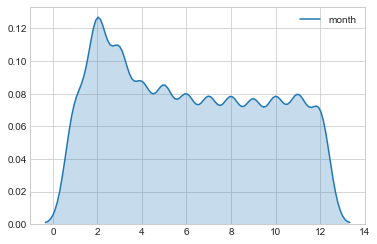

In [75]:
#Here we analyze that im the first 4 month the no of clearing dates is more that the rest of the year
ax=sns.kdeplot(x_train.month, shade=True)

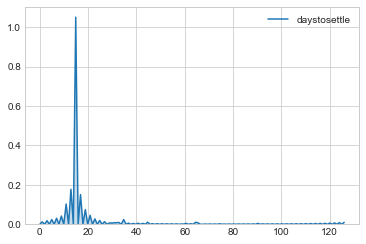

In [76]:
#Here we roughly see that the expected day to clearing the invoice is around 10-25 days
ax=sns.kdeplot(x_train.daystosettle, shade=True)

In [77]:
x_train.dtypes

index                              int64
business_code                     object
cust_number                       object
name_customer                     object
CustNumInt                         int32
paymentint                         int32
clear_date                datetime64[ns]
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
daystosettle                       int64
daystobaseline                     int64
daystoduebas                       int64
month                              int64
dayofweek                          int64
is_weekend                         int32
dtype: object

In [78]:
#Here we check the month's density and see the trend
#ax=sns.kdeplot(x_train.clear_date, shade=True)

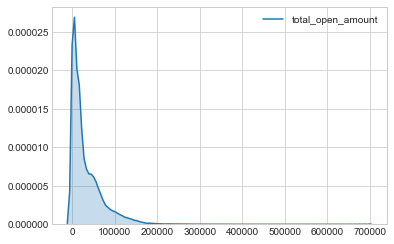

In [79]:
#In the dataset the maximum amount lies between 0-2 lakhs
ax=sns.kdeplot(x_train.total_open_amount, shade=True)

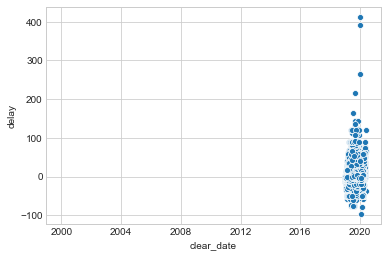

In [80]:
#The no of clear date in 2019 as well as 2020. Here we can see 2-3 dots far away from the max points and there are amole of negative and positive delays 
sns.scatterplot(x_train['clear_date'],y_train)

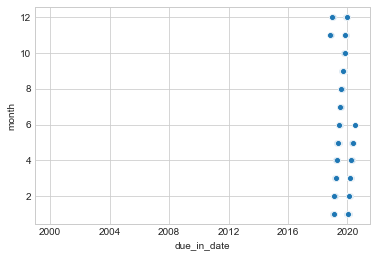

In [81]:
#Here we are cross checking that as we go to the later half of every year whether the expected months of clearance increases or not
sns.scatterplot(x_train['due_in_date'],x_train['month'])

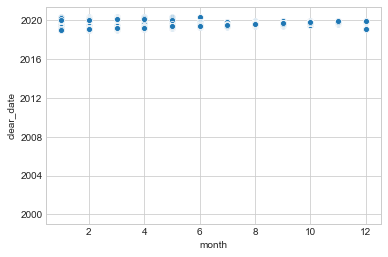

In [82]:
#The same checking we are seeing for months and clearing date and we got te result what we expected
sns.scatterplot(x_train['month'],x_train['clear_date'])

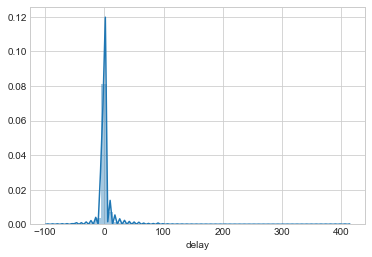

In [83]:
#The graph of delay where average delay lies between -50 to 50 days
sns.distplot(y_train)

[]

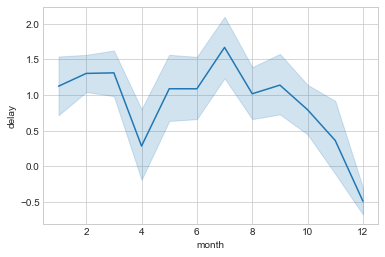

In [84]:
#Here we see that in most of the cases the delay is increasing and then it is expected to decrease
sns.lineplot(x_train['month'],y_train)
plt.plot()

In [85]:
#sns.lineplot(x="month", y="clear_date",data=X_train) plt.plot()

[]

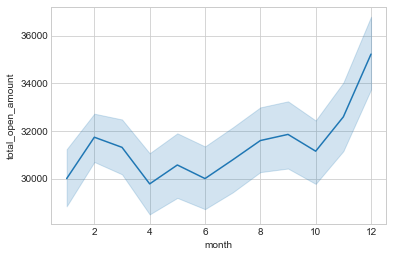

In [86]:
#Here we see that after the month of october the amount is much more means the bigger invoices are expected to cleared in the end of the years
sns.lineplot(x="month", y="total_open_amount",data=x_train)
plt.plot()

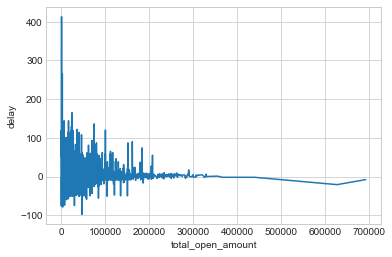

In [87]:
#Here we see the bigger amount is cleared on time as compared to smaller amount
sns.lineplot(x_train["total_open_amount"], y_train)

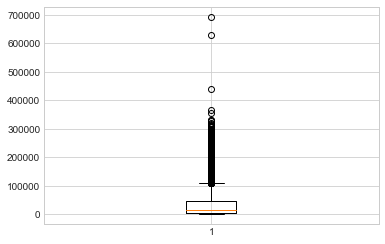

In [88]:
#Plotting the total_open_amount for finding the outlier
plt.boxplot(x_train.total_open_amount)
plt.show()

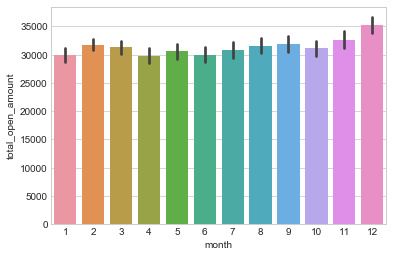

In [89]:
#Mostly we see that amount lies b/w 30k and 40k
sns.barplot(x='month',y='total_open_amount',data=x_train)

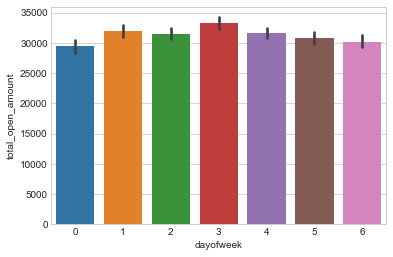

In [90]:
#Here we see that company is expecting this much amount in these days
sns.barplot(x='dayofweek',y='total_open_amount',data=x_train)

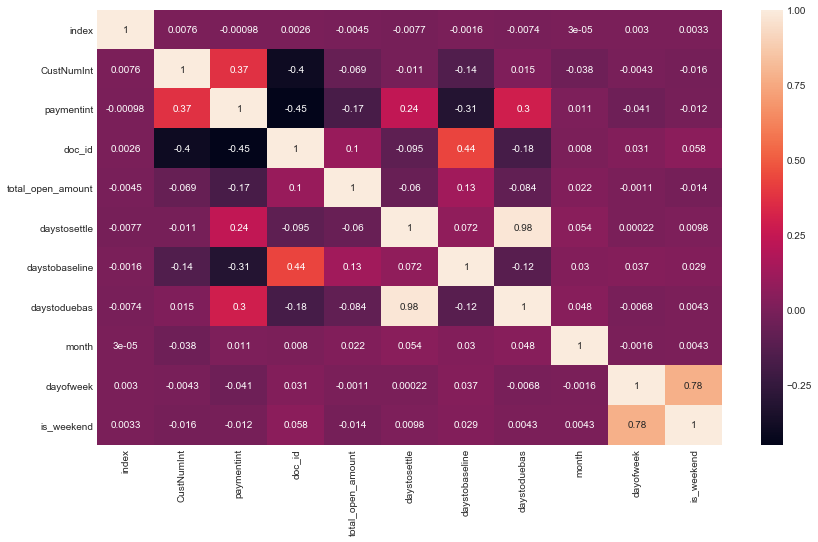

In [91]:
#checking the heatmao for correlation between different features
corr=x_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

# FE

In [92]:
#Calculating delay for train set
x_train['delay']=(x_train['clear_date']-x_train['due_in_date']).dt.days

In [93]:
#Calculating delay for val2 set
x_val2['delay']=(x_val2['clear_date'] - x_val2['due_in_date']).dt.days

In [94]:
#Calculating delay for val1 set
x_val1['delay']=(x_val1['clear_date'] - x_val1['due_in_date']).dt.days

In [95]:
#calculating average delay of every customer 
x_train.groupby('cust_number')['delay'].agg({'mean'}).head()

,mean
cust_number,
0100000048,39.000000
0100000158,49.000000
0100000161,1.000000
0100000217,-1.000000
0100000222,-2.891892


In [96]:
#converting it to string type as it in both string and int type
x_train['cust_number']=x_train['cust_number'].astype(str)

In [97]:
#binning w.r.t delay
#bins = [-1000,-1, 15, 30, 45, 60, 1000000000]
#labels =[0,1,2,3,4,5]
#x_train['bucket'] = pd.cut(x_train['delay'], bins,labels=labels)
#x_val2['bucket'] = pd.cut(x_val2['delay'], bins,labels=labels)
#x_val1['bucket'] = pd.cut(x_val1['delay'], bins,labels=labels)
#x_train.head()

In [98]:
#binning w.r.t total_open_amount
amtbins = [-1,5000,50000,200000,500000,773749.61]
labels =[1,2,3,4,5]
x_train['amtbuk'] = pd.cut(x_train['total_open_amount'],amtbins,labels=labels)
x_val2['amtbuk']= pd.cut(x_val2['total_open_amount'],amtbins,labels=labels)
x_val1['amtbuk']= pd.cut(x_val1['total_open_amount'],amtbins,labels=labels)
x_train.head()

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend,delay,amtbuk
12797,12827,CA02,0140105686,SYSC corporation,417,8,2019-03-04,2.960527e+09,2019-02-05,2019-02-05,2019-02-23,842.439,2019-02-13,CA10,18,8,10,2,5,1,9,1
29083,29153,U001,0200772670,ASSOCIAT associates,900,51,2020-02-19,1.930476e+09,2020-02-04,2020-02-04,2020-02-19,63812.810,2020-02-04,NAU5,15,0,15,2,2,0,0,3
6222,6236,U001,0200759878,SA trust,872,37,2020-02-18,1.930462e+09,2020-01-31,2020-01-31,2020-02-15,87082.440,2020-01-31,NAH4,15,0,15,2,5,1,3,3
16791,16839,U001,0200744019,TARG co,839,22,2020-02-14,1.930457e+09,2020-01-31,2020-01-31,2020-02-15,10101.960,2020-01-31,NAA8,15,0,15,2,5,1,-1,2
19817,19873,U001,0200739006,AL us,821,22,2019-05-02,1.929145e+09,2019-04-17,2019-04-17,2019-05-02,7561.080,2019-04-17,NAA8,15,0,15,5,3,0,0,2


In [99]:
x_val2.shape

(3987, 22)

In [100]:
x_val1.shape

(3985, 22)

In [101]:
x_val1.head(1)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend,delay,amtbuk
32049,32126,U001,CCU013,KRAFT F corporation,1443,72,2019-05-31,1.929203e+09,2019-04-24,2019-04-24,2019-04-24,6080.9,2019-04-24,NAX2,0,0,0,4,2,0,37,2


In [102]:
x_val2.head(1)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,month,dayofweek,is_weekend,delay,amtbuk
8327,8346,U001,0200769623,WAL-MAR trust,894,37,2019-09-13,1.929818e+09,2019-09-03,2019-09-03,2019-09-18,31503.67,2019-09-03,NAH4,15,0,15,9,2,0,-5,2


In [103]:
#calculating the following by grouping amtbuk and delay
x_train.groupby('amtbuk')['delay'].agg({'count','mean','min','max'})

,max,mean,min,count
amtbuk,,,,
1,413,0.553998,-79,9917
2,165,1.183199,-98,19749
3,136,0.742737,-59,8571
4,55,2.287770,-7,139
5,-8,-14.500000,-21,2


In [104]:
#x_train.groupby('bucket')['delay'].agg({'count','mean','min','max'})

In [105]:
#x_train.groupby('bucket')['delay'].count()

In [106]:
LE = LabelEncoder()

In [107]:
x_train['amtbuk'] = LE.fit_transform(x_train['amtbuk'])
#x_train['bucket'] = LE.fit_transform(x_train['bucket'])

In [108]:
x_val2['amtbuk'] = LE.fit_transform(x_val2['amtbuk'])
#x_val2['bucket'] = LE.fit_transform(x_val2['bucket'])

In [109]:
x_val1['amtbuk'] = LE.fit_transform(x_val1['amtbuk'])
#x_val1['bucket'] = LE.fit_transform(x_val1['bucket'])

In [110]:
#x_train1=x_train[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','bucket','daystobaseline','daystoclear']].copy()
x_train1=x_train[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','daystobaseline','daystoduebas']].copy()

In [111]:
#x_val2_1=x_val2[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','bucket','daystobaseline','daystoclear']].copy()
x_val2_1=x_val2[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','daystobaseline','daystoduebas']].copy()

In [112]:
#x_val2_1=x_val2[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','bucket','daystobaseline','daystoclear']].copy()
x_val1_1=x_val1[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','daystosettle','dayofweek','daystobaseline','daystoduebas']].copy()

In [113]:
#outlier handling and it's treatment
def outlier_treatment(total_open_amount):
    sorted(total_open_amount)
    Q1,Q3 = np.percentile(total_open_amount , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [114]:
low,high=outlier_treatment(x_train.total_open_amount)

In [115]:
low,high

(-57772.281375, 108740.096825)

In [116]:
#removing outliers which are less than the mean of total_open_amount
index=np.where((x_train['total_open_amount']<low)==True)[0]
x_train.loc[index,['total_open_amount']]=x_train.loc[index,['total_open_amount']].mean()

# Feature Selection

In [117]:
#to check for duplicate rows
duplicated_rows = x_train[x_train.duplicated()].index.values

In [118]:
duplicated_rows

array([], dtype=int64)

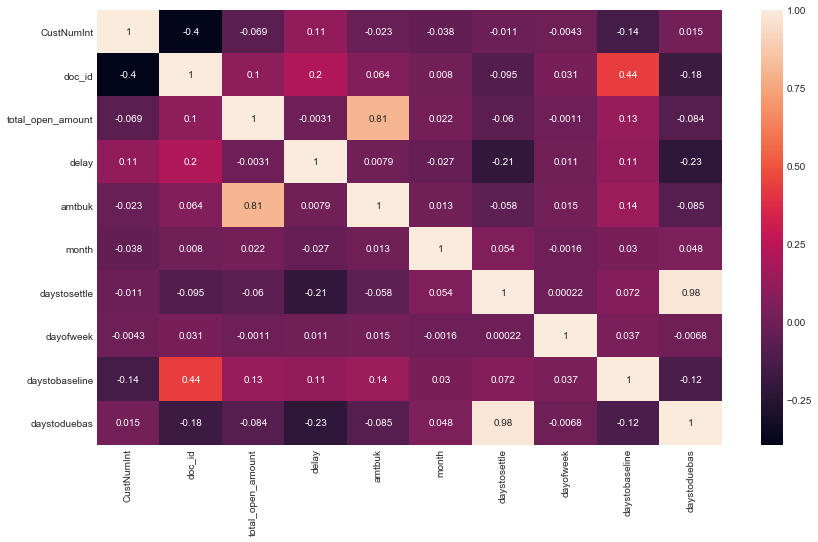

In [119]:
#to find the dependencies of columns
corr=x_train1.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [120]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38378 entries, 12797 to 12789
Data columns (total 10 columns):
CustNumInt           38378 non-null int32
doc_id               38378 non-null float64
total_open_amount    38378 non-null float64
delay                38378 non-null int64
amtbuk               38378 non-null int64
month                38378 non-null int64
daystosettle         38378 non-null int64
dayofweek            38378 non-null int64
daystobaseline       38378 non-null int64
daystoduebas         38378 non-null int64
dtypes: float64(2), int32(1), int64(7)
memory usage: 3.1 MB


# Correlation coefficient

In [121]:
#dropping delay column from train set
x_train1.drop(columns='delay',inplace=True)

In [122]:
#dropping delay column from val1 set
x_val1_1.drop(columns='delay',inplace=True)

In [123]:
#dropping delay column from val2 set
x_val2_1.drop(columns='delay',inplace=True)

In [124]:
#handling correlation
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [125]:
handling_correlation(x_train1.copy(),0.1)

['doc_id', 'total_open_amount', 'amtbuk', 'daystoduebas', 'daystobaseline']

In [126]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38378 entries, 12797 to 12789
Data columns (total 9 columns):
CustNumInt           38378 non-null int32
doc_id               38378 non-null float64
total_open_amount    38378 non-null float64
amtbuk               38378 non-null int64
month                38378 non-null int64
daystosettle         38378 non-null int64
dayofweek            38378 non-null int64
daystobaseline       38378 non-null int64
daystoduebas         38378 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 2.8 MB


In [127]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=130)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(8).plot(kind='barh')  
    return final_df

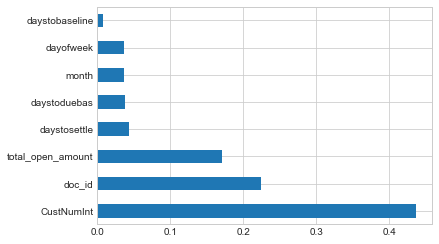

In [128]:
#graphical representation of important features derived 
feature_importance=tree_based_feature_importance(x_train1,y_train)

In [129]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38378 entries, 12797 to 12789
Data columns (total 9 columns):
CustNumInt           38378 non-null int32
doc_id               38378 non-null float64
total_open_amount    38378 non-null float64
amtbuk               38378 non-null int64
month                38378 non-null int64
daystosettle         38378 non-null int64
dayofweek            38378 non-null int64
daystobaseline       38378 non-null int64
daystoduebas         38378 non-null int64
dtypes: float64(2), int32(1), int64(6)
memory usage: 2.8 MB


# Modelling & Accuracy Metrics

In [130]:
#from sklearn.model_selection import validation_curve
#train_scoreNum, test_scoreNum = validation_curve(
#                                RandomForestClassifier(),
#                                X = x_train, y = y_train, 
#                                param_name = 'n_estimators', 
#                                param_range = num_est, cv = 3)

In [131]:
#importing sklearn.metrics error calculators
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [132]:
#creating arrays for storing score values
MSE_Score = []
R2_Score = []
Algorithm = []
RMSE_Score = []

In [133]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train1, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [134]:
# Predicting the Train set Results
predicted = clf.predict(x_train1)

In [135]:
#converting the predicted value in int
predicted = predicted.astype(int)

In [136]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [137]:
X=pd.DataFrame({'Actual':y_train, 'Predicted':predicted})
X.head(1)

,Actual,Predicted
12797,9.0,8


In [138]:
# Fitting Random Forest Regressor Tree to the validation Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_val2_1, y_val2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [139]:
# Predicting the Test val2 Results
predicted = clf.predict(x_val2_1)

In [140]:
#converting the predicted value in int
predicted = predicted.astype(int)

In [141]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [142]:
X=pd.DataFrame({'Actual':y_val2, 'Predicted':predicted})
X

,Actual,Predicted
8327,-5.0,-4
8073,-4.0,-3
28765,1.0,1
29190,-5.0,-4
21308,-2.0,-1
46213,0.0,-1
4937,-1.0,0
42841,1.0,2
43743,0.0,0
15902,8.0,3


In [143]:
# Fitting Random Forest Regressor Tree to the validation Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_val1_1, y_val1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [144]:
# Predicting the Test Set Results
predicted = clf.predict(x_val1_1)

In [145]:
#converting the predicted value in int
predicted = predicted.astype(int)

In [146]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [147]:
X=pd.DataFrame({'Actual':y_val1, 'Predicted':predicted})
X.head(2)

,Actual,Predicted
32049,37.0,37
27460,6.0,2


In [148]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, RMSE_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score','RMSE_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Random Forest Regressor,12.217442,0.902718,3.495346
1,Random Forest Regressor,10.494357,0.883960,3.239499
2,Random Forest Regressor,17.825596,0.856945,4.222037


# Final Prediction

In [149]:
#binning w.r.t total_open_amount
amtbins = [-1,5000,50000,200000,500000,1134400.14]
labels =[1,2,3,4,5]
test_data['amtbuk'] = pd.cut(test_data['total_open_amount'],amtbins,labels=labels)
test_data.head(1)

,index,business_code,cust_number,name_customer,CustNumInt,paymentint,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,daystosettle,daystobaseline,daystoduebas,delay,month,dayofweek,is_weekend,amtbuk
0,46463,U001,0200148860,DOLLA corporation,526,22,NaT,1.930842e+09,2020-05-01,2020-05-01,2020-05-16,49697.16,2020-05-01,NAA8,15,0,15,NaN,5,5,1,2


In [150]:
#copying the columns with numeric values for fitting it further
new=test_data[['CustNumInt','doc_id','total_open_amount','delay','amtbuk','month','paymentint','daystosettle','daystobaseline','dayofweek','daystoduebas']].copy()

In [151]:
#adding delay columnn in new_delay
new_delay=new['delay']

In [152]:
#dropping delay column form new
new.drop(columns='delay',inplace=True)

In [153]:
#replacing the nan values with the given range in new_delay
import random
new_delay= np.random.randint(-20, 100, test_data.shape[0])

In [154]:
#Fitting Random Forest Regressor Tree to test set
Algorithm.append('Random Forest Regressor of test set')
clf = RandomForestRegressor()
clf.fit(new, new_delay)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [155]:
# Predicting the Test Set Results
predicted = clf.predict(new)

In [156]:
predicted = predicted.astype(int)

In [157]:
X=pd.DataFrame({'Predicted delay':predicted})
X

,Predicted delay
0,21
1,34
2,38
3,19
4,28
5,51
6,73
7,13
8,41
9,15


In [158]:
#binning w.r.t. predicted_delay
bins = [-100,-1, 15, 30, 45, 60, 100000]
labels =["Advance Payment","0-15 days","16-30 days","31-45 days","46-60 days","60+ days"]
X['bucket'] = pd.cut(X['Predicted delay'], bins,labels=labels)
X.head(10)

,Predicted delay,bucket
0,21,16-30 days
1,34,31-45 days
2,38,31-45 days
3,19,16-30 days
4,28,16-30 days
5,51,46-60 days
6,73,60+ days
7,13,0-15 days
8,41,31-45 days
9,15,0-15 days


In [159]:
X['due_in_date']=test_data['due_in_date'].values

In [160]:
#calculating and printing the final predicted clear date column
X['Predicted_Clear_Date'] = X['due_in_date'] + pd.to_timedelta(pd.np.ceil(X['Predicted delay']), unit="D")
X

,Predicted delay,bucket,due_in_date,Predicted_Clear_Date
0,21,16-30 days,2020-05-16,2020-06-06
1,34,31-45 days,2020-04-14,2020-05-18
2,38,31-45 days,2020-05-14,2020-06-21
3,19,16-30 days,2020-03-16,2020-04-04
4,28,16-30 days,2020-04-19,2020-05-17
5,51,46-60 days,2020-03-15,2020-05-05
6,73,60+ days,2020-04-15,2020-06-27
7,13,0-15 days,2020-05-15,2020-05-28
8,41,31-45 days,2020-03-31,2020-05-11
9,15,0-15 days,2020-04-20,2020-05-05
